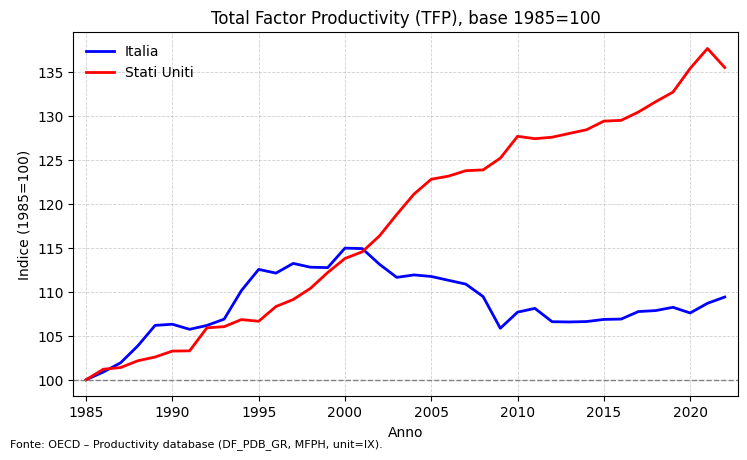

In [0]:
# Requisiti: requests, pandas, matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# === 1) Estrazione OECD API (SDMX v3) ===
BASE = "https://sdmx.oecd.org/public/rest/data"
FLOW = "OECD.SDD.TPS,DSD_PDB@DF_PDB_GR,1.0"
KEY  = "ITA+USA.A.MFPH._T.IX.V._Z._Z._Z"
PARAMS = "dimensionAtObservation=AllDimensions&format=csvfilewithlabels&startPeriod=1985&endPeriod=2023"
URL = f"{BASE}/{FLOW}/{KEY}?{PARAMS}"

resp = requests.get(URL, headers={"Accept": "text/csv", "User-Agent": "oecd-sdmx-demo"})
resp.raise_for_status()
df = pd.read_csv(StringIO(resp.text))

# === 2) Tabella anni × paese, normalizzazione base 1985=100 ===
df = df[["REF_AREA", "TIME_PERIOD", "OBS_VALUE"]].dropna()
df["OBS_VALUE"] = pd.to_numeric(df["OBS_VALUE"], errors="coerce")
wide = df.pivot(index="TIME_PERIOD", columns="REF_AREA", values="OBS_VALUE").sort_index()
norm = wide / wide.loc[1985] * 100  # base 1985=100

# === 3) Grafico con legenda a sinistra ===
fig, ax = plt.subplots(figsize=(7.5, 4.6))

ax.plot(norm.index, norm["ITA"], color="blue", linewidth=2, label="Italia")
ax.plot(norm.index, norm["USA"], color="red", linewidth=2, label="Stati Uniti")

# Linea base 100
ax.axhline(100, linestyle="--", linewidth=1, color="gray")

# Titoli e assi
ax.set_title("Total Factor Productivity (TFP), base 1985=100")
ax.set_xlabel("Anno")
ax.set_ylabel("Indice (1985=100)")

# Griglia leggera
ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.6)
ax.set_axisbelow(True)

# Legenda in basso a sinistra
ax.legend(loc="upper left", fontsize=10, frameon=False)

# Margini e layout
ax.margins(x=0.02, y=0.05)
fig.tight_layout()

# Fonte
fig.text(0.01, 0.01, "Fonte: OECD – Productivity database (DF_PDB_GR, MFPH, unit=IX).", 
         ha="left", va="bottom", fontsize=8)

plt.show()
